In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
results_file = r"C:\Users\giusy\OneDrive\Desktop\AI_Healtcare\IMU-compensatory-movement-detection\Data\Models\model_results_summary.csv"

In [9]:
results = pd.read_csv(results_file)

In [10]:

# Your metrics
metrics = ['f1_macro', 'accuracy', 'precision_macro', 'recall_macro', 'roc_auc']

# Keep only the columns we care about
results_small = results[['task', 'model_name', 'window_size'] + metrics].copy()

# ---------- SUMMARY DATAFRAME ----------

# One row per (task, model_name, window_size), metrics averaged over repeats
summary = (
    results_small
    .groupby(['task', 'model_name', 'window_size'], as_index=False)[metrics]
    .mean()
    .sort_values(['task', 'model_name', 'window_size'])
)

# If you want it globally sorted by window_size:
summary_by_window = summary.sort_values('window_size')

print(summary.head())
print(summary_by_window.head())



        task model_name window_size  f1_macro  accuracy  precision_macro  \
0  all_tasks        KNN        1000  0.528178  0.529893         0.548566   
1  all_tasks   LASSO_LR        1000  0.633275  0.631579         0.650708   
2  all_tasks   LASSO_LR         250  0.586468  0.588695         0.601834   
3  all_tasks   LASSO_LR         500  0.567213  0.585106         0.624897   
4  all_tasks   LASSO_LR         750  0.621643  0.617849         0.631899   

   recall_macro   roc_auc  
0      0.529091  0.720970  
1      0.630984  0.792695  
2      0.587607  0.770372  
3      0.583370  0.791715  
4      0.617828  0.789296  
            task model_name window_size  f1_macro  accuracy  precision_macro  \
0      all_tasks        KNN        1000  0.528178  0.529893         0.548566   
35   cup-placing        SVM        1000  0.630910  0.639269         0.640756   
40   cup-placing    XGBoost        1000  0.531508  0.538813         0.531522   
140       wiping        SVM        1000  0.609689  0.61

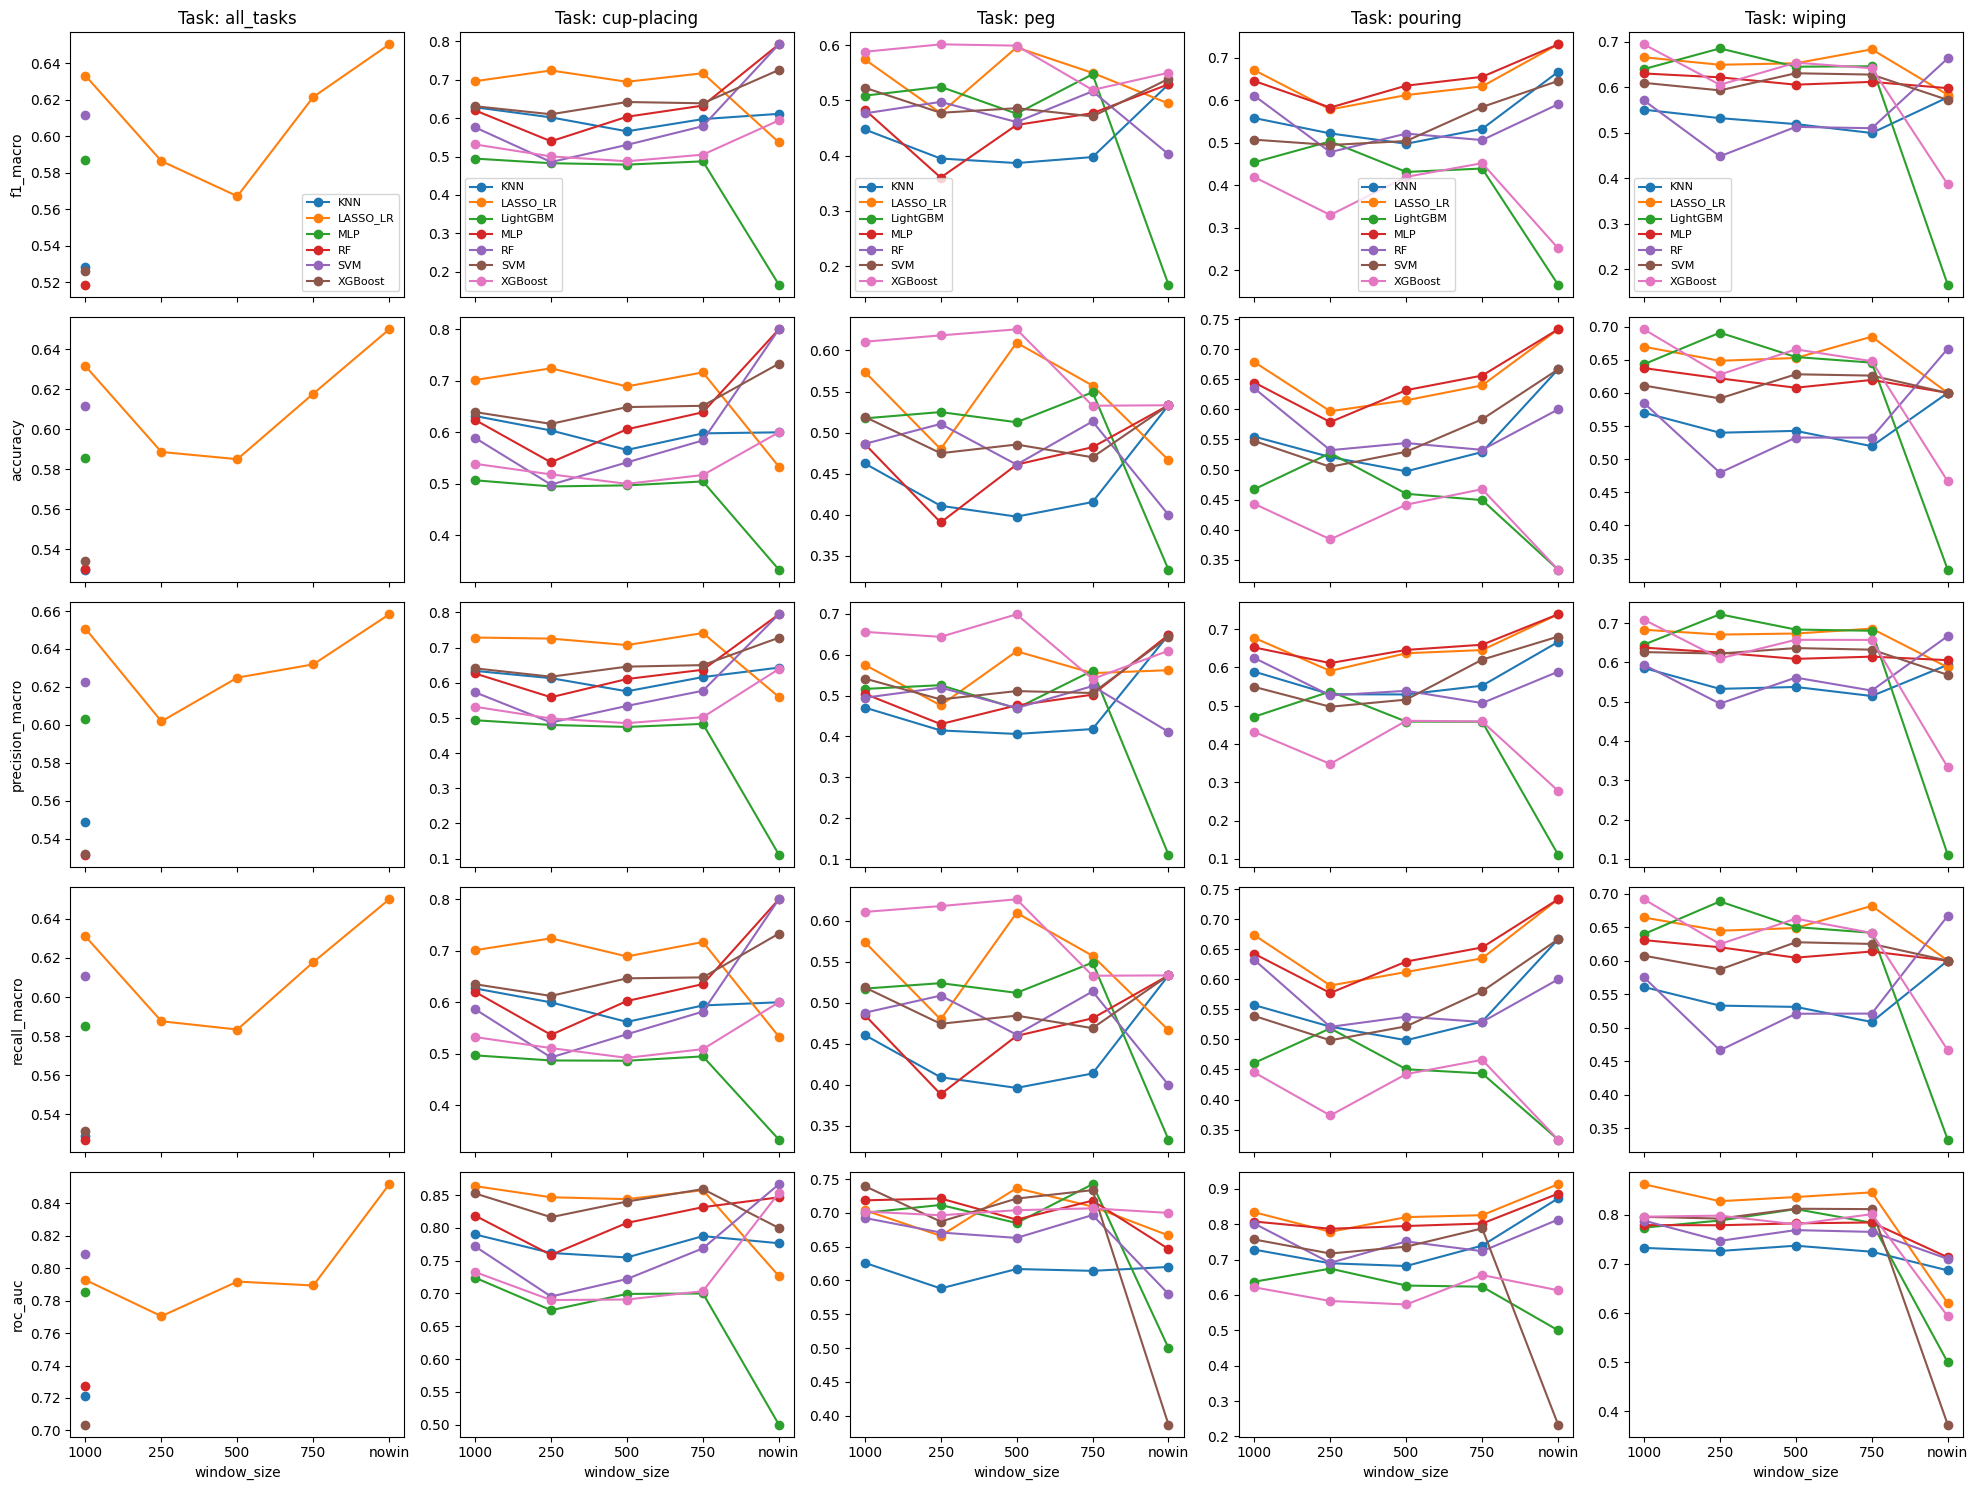

In [11]:
tasks = sorted(summary['task'].unique())
n_rows = len(metrics)      # 5 rows (one per metric)
n_cols = len(tasks)        # e.g. 4 tasks → 4 columns

fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(4 * n_cols, 3 * n_rows),
    sharex='col'
)

# Make axes always 2D
if n_rows == 1 and n_cols == 1:
    axes = [[axes]]
elif n_rows == 1:
    axes = [axes]
elif n_cols == 1:
    axes = [[ax] for ax in axes]

for i, metric in enumerate(metrics):
    for j, task in enumerate(tasks):
        ax = axes[i][j]

        df_task = summary[summary['task'] == task]
        models = df_task['model_name'].unique()

        for model in models:
            df_tm = (
                df_task[df_task['model_name'] == model]
                .sort_values('window_size')
            )

            x = df_tm['window_size']
            y = df_tm[metric]

            ax.plot(x, y, marker='o', label=model)

        # Labels / titles
        if i == 0:
            ax.set_title(f"Task: {task}")
        if j == 0:
            ax.set_ylabel(metric)

        if i == n_rows - 1:
            ax.set_xlabel("window_size")

        # Legend only on the first row (one per column)
        if i == 0:
            ax.legend(fontsize=8)

plt.tight_layout()
plt.show()


In [12]:
## Consider window of 1000 ms

In [13]:
# display per task
task_names = summary_by_window['task'].unique()
task_names

array(['all_tasks', 'cup-placing', 'wiping', 'peg', 'pouring'],
      dtype=object)

In [14]:

df_1000 = summary_by_window[summary_by_window['window_size'] == "1000"]

for task_name in task_names:
    df_task = df_1000[df_1000["task"] == task_name]

    display(df_task.sort_values(by="f1_macro"))

,task,model_name,window_size,f1_macro,accuracy,precision_macro,recall_macro,roc_auc
7,all_tasks,RF,1000,0.518724,0.530404,0.531599,0.527068,0.727494
9,all_tasks,XGBoost,1000,0.526288,0.533981,0.531739,0.531481,0.703619
0,all_tasks,KNN,1000,0.528178,0.529893,0.548566,0.529091,0.720970
6,all_tasks,MLP,1000,0.587062,0.585590,0.602857,0.585403,0.785473
8,all_tasks,SVM,1000,0.611950,0.611650,0.622383,0.610522,0.809004
1,all_tasks,LASSO_LR,1000,0.633275,0.631579,0.650708,0.630984,0.792695


,task,model_name,window_size,f1_macro,accuracy,precision_macro,recall_macro,roc_auc
20,cup-placing,LightGBM,1000,0.494624,0.506849,0.493232,0.496901,0.724066
40,cup-placing,XGBoost,1000,0.531508,0.538813,0.531522,0.532459,0.732721
30,cup-placing,RF,1000,0.575971,0.589041,0.572587,0.586548,0.771806
25,cup-placing,MLP,1000,0.620078,0.624049,0.626134,0.620184,0.818745
10,cup-placing,KNN,1000,0.628200,0.631659,0.633553,0.626866,0.790079
35,cup-placing,SVM,1000,0.630910,0.639269,0.640756,0.635021,0.852659
15,cup-placing,LASSO_LR,1000,0.696134,0.701674,0.728399,0.701242,0.863794


,task,model_name,window_size,f1_macro,accuracy,precision_macro,recall_macro,roc_auc
115,wiping,KNN,1000,0.550735,0.570175,0.585591,0.560713,0.732354
135,wiping,RF,1000,0.570983,0.584795,0.593690,0.575169,0.787738
140,wiping,SVM,1000,0.609689,0.611111,0.626051,0.607395,0.795426
130,wiping,MLP,1000,0.630206,0.637427,0.637423,0.630613,0.778650
125,wiping,LightGBM,1000,0.639871,0.643275,0.645072,0.639573,0.773523
120,wiping,LASSO_LR,1000,0.665785,0.669591,0.682911,0.664293,0.861643
145,wiping,XGBoost,1000,0.694147,0.695906,0.708518,0.691443,0.795737


,task,model_name,window_size,f1_macro,accuracy,precision_macro,recall_macro,roc_auc
45,peg,KNN,1000,0.447448,0.462523,0.470631,0.460772,0.626193
65,peg,RF,1000,0.476507,0.486289,0.494605,0.487835,0.692518
60,peg,MLP,1000,0.483358,0.486289,0.504339,0.485221,0.718625
55,peg,LightGBM,1000,0.508592,0.517367,0.516166,0.517279,0.700117
70,peg,SVM,1000,0.523011,0.519196,0.541570,0.518746,0.739738
50,peg,LASSO_LR,1000,0.574340,0.574040,0.575030,0.574032,0.704009
75,peg,XGBoost,1000,0.587980,0.610603,0.655606,0.610693,0.702066


,task,model_name,window_size,f1_macro,accuracy,precision_macro,recall_macro,roc_auc
110,pouring,XGBoost,1000,0.419328,0.442822,0.431586,0.445020,0.621635
90,pouring,LightGBM,1000,0.454183,0.467153,0.471397,0.461028,0.637578
105,pouring,SVM,1000,0.507335,0.547445,0.549222,0.539115,0.757030
80,pouring,KNN,1000,0.558178,0.554745,0.589015,0.557136,0.728354
100,pouring,RF,1000,0.610513,0.635036,0.624731,0.632422,0.801980
95,pouring,MLP,1000,0.645223,0.644769,0.652331,0.642566,0.807867
85,pouring,LASSO_LR,1000,0.670715,0.678832,0.677173,0.673594,0.834131


In [29]:
# 4) Exclude the "all tasks" row(s)
df_1000_no_all = df_1000[df_1000['task'] != 'all tasks'].copy()

# 5) Average metrics across tasks per model
avg_across_tasks = (
    df_1000_no_all
    .groupby('model_name', as_index=False)[metrics]
    .mean()
    .sort_values('f1_macro', ascending=False)   # sort by best f1_macro
)

display(avg_across_tasks)


,model_name,f1_macro,accuracy,precision_macro,recall_macro,roc_auc
1,LASSO_LR,0.648050,0.651143,0.662844,0.648829,0.811255
3,MLP,0.593185,0.595625,0.604617,0.592797,0.781872
5,SVM,0.576579,0.585734,0.595997,0.582160,0.790771
6,XGBoost,0.551850,0.564425,0.571794,0.562219,0.711156
4,RF,0.550540,0.565113,0.563442,0.561808,0.756307
0,KNN,0.542548,0.549799,0.565471,0.546916,0.719590
2,LightGBM,0.524318,0.533661,0.531467,0.528695,0.708821


In [30]:
best_models = ["LASSO_LR", "MLP", "SVM", "XGBoost"]

In [31]:

df_1000 = summary_by_window[summary_by_window['window_size'] == "1000"]
df_1000_best = df_1000[df_1000["model_name"].isin(best_models)]

for task_name in task_names:
    df_task = df_1000_best[df_1000_best["task"] == task_name]

    display(df_task.sort_values(by="f1_macro"))

,task,model_name,window_size,f1_macro,accuracy,precision_macro,recall_macro,roc_auc
9,all_tasks,XGBoost,1000,0.526288,0.533981,0.531739,0.531481,0.703619
6,all_tasks,MLP,1000,0.587062,0.585590,0.602857,0.585403,0.785473
8,all_tasks,SVM,1000,0.611950,0.611650,0.622383,0.610522,0.809004
1,all_tasks,LASSO_LR,1000,0.633275,0.631579,0.650708,0.630984,0.792695


,task,model_name,window_size,f1_macro,accuracy,precision_macro,recall_macro,roc_auc
40,cup-placing,XGBoost,1000,0.531508,0.538813,0.531522,0.532459,0.732721
25,cup-placing,MLP,1000,0.620078,0.624049,0.626134,0.620184,0.818745
35,cup-placing,SVM,1000,0.630910,0.639269,0.640756,0.635021,0.852659
15,cup-placing,LASSO_LR,1000,0.696134,0.701674,0.728399,0.701242,0.863794


,task,model_name,window_size,f1_macro,accuracy,precision_macro,recall_macro,roc_auc
140,wiping,SVM,1000,0.609689,0.611111,0.626051,0.607395,0.795426
130,wiping,MLP,1000,0.630206,0.637427,0.637423,0.630613,0.778650
120,wiping,LASSO_LR,1000,0.665785,0.669591,0.682911,0.664293,0.861643
145,wiping,XGBoost,1000,0.694147,0.695906,0.708518,0.691443,0.795737


,task,model_name,window_size,f1_macro,accuracy,precision_macro,recall_macro,roc_auc
60,peg,MLP,1000,0.483358,0.486289,0.504339,0.485221,0.718625
70,peg,SVM,1000,0.523011,0.519196,0.541570,0.518746,0.739738
50,peg,LASSO_LR,1000,0.574340,0.574040,0.575030,0.574032,0.704009
75,peg,XGBoost,1000,0.587980,0.610603,0.655606,0.610693,0.702066


,task,model_name,window_size,f1_macro,accuracy,precision_macro,recall_macro,roc_auc
110,pouring,XGBoost,1000,0.419328,0.442822,0.431586,0.445020,0.621635
105,pouring,SVM,1000,0.507335,0.547445,0.549222,0.539115,0.757030
95,pouring,MLP,1000,0.645223,0.644769,0.652331,0.642566,0.807867
85,pouring,LASSO_LR,1000,0.670715,0.678832,0.677173,0.673594,0.834131


In [16]:

metrics = ['f1_macro', 'accuracy', 'precision_macro', 'recall_macro', 'roc_auc']

# 1) Start from summary_by_window and exclude "all tasks"
df_no_all = summary_by_window[summary_by_window['task'] != 'all tasks'].copy()

# 2) Exclude the "no window" rows BEFORE converting to int
#    (cover a few possible spellings just in case)
no_win_labels = ['no_win', 'nowin', 'No_win', 'NO_WIN']

df_no_all = df_no_all[~df_no_all['window_size'].isin(no_win_labels)]

# 3) Safely convert window_size to numeric ints
df_no_all['window_size'] = pd.to_numeric(df_no_all['window_size'], errors='coerce')
df_no_all = df_no_all.dropna(subset=['window_size'])
df_no_all['window_size'] = df_no_all['window_size'].astype(int)

# 4) Average metrics across tasks for each (model_name, window_size)
avg_tasks = (
    df_no_all
    .groupby(['model_name', 'window_size'], as_index=False)[metrics]
    .mean()
)

# Optional: std across tasks for error bars (accuracy & f1_macro)
std_tasks = (
    df_no_all
    .groupby(['model_name', 'window_size'], as_index=False)[['accuracy', 'f1_macro']]
    .std()
    .rename(columns={'accuracy': 'accuracy_std', 'f1_macro': 'f1_macro_std'})
)

avg_tasks = avg_tasks.merge(std_tasks, on=['model_name', 'window_size'], how='left')



In [17]:
# Font parameters (tweak as you like)
TITLE_FONTSIZE  = 16
LABEL_FONTSIZE  = 14
TICK_FONTSIZE   = 12
LEGEND_FONTSIZE = 12


models = avg_tasks['model_name'].unique()
window_sizes = sorted(avg_tasks['window_size'].unique())

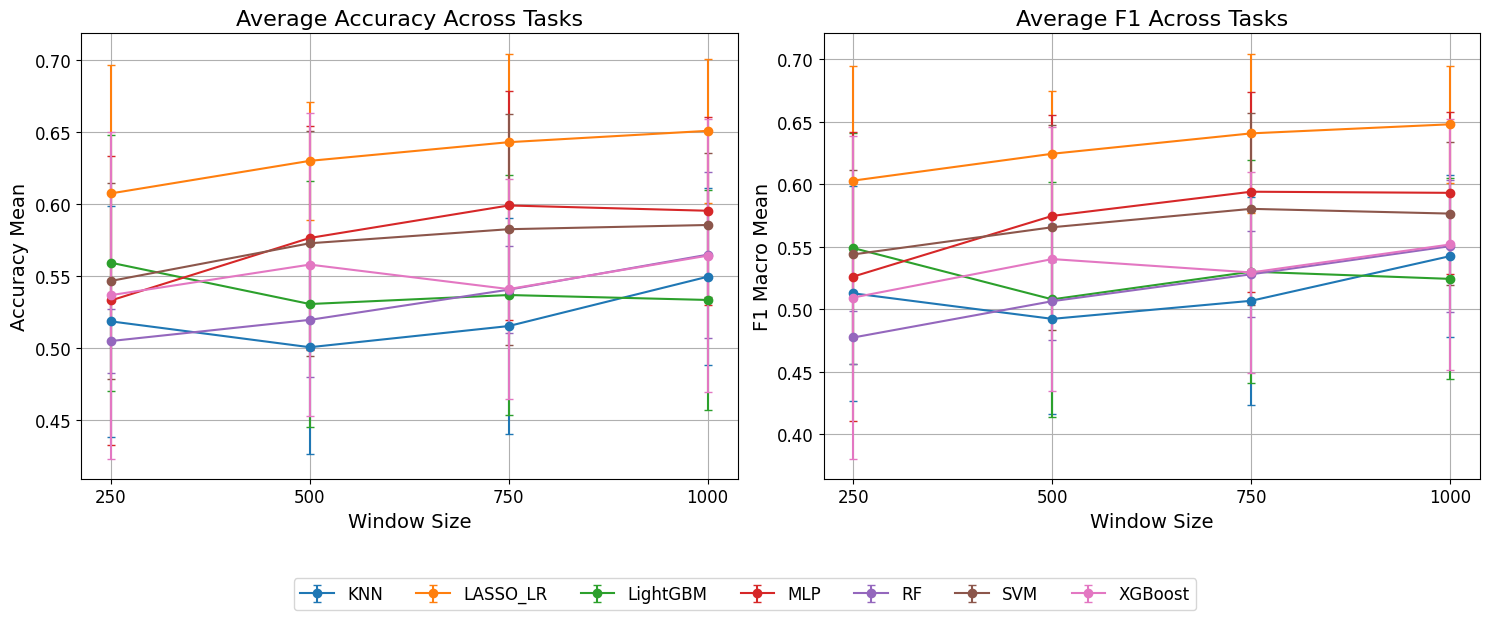

In [22]:


fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharex=True)

# --- Left: Accuracy ---
for model in models:
    df_m = avg_tasks[avg_tasks['model_name'] == model].sort_values('window_size')
    axes[0].errorbar(
        df_m['window_size'],
        df_m['accuracy'],
        yerr=df_m['accuracy_std'],
        marker='o',
        capsize=3,
        label=model
    )

axes[0].set_title("Average Accuracy Across Tasks", fontsize=TITLE_FONTSIZE)
axes[0].set_xlabel("Window Size", fontsize=LABEL_FONTSIZE)
axes[0].set_ylabel("Accuracy Mean", fontsize=LABEL_FONTSIZE)

# --- Right: F1 Macro ---
for model in models:
    df_m = avg_tasks[avg_tasks['model_name'] == model].sort_values('window_size')
    axes[1].errorbar(
        df_m['window_size'],
        df_m['f1_macro'],
        yerr=df_m['f1_macro_std'],
        marker='o',
        capsize=3,
        label=model
    )

axes[1].set_title("Average F1 Across Tasks", fontsize=TITLE_FONTSIZE)
axes[1].set_xlabel("Window Size", fontsize=LABEL_FONTSIZE)
axes[1].set_ylabel("F1 Macro Mean", fontsize=LABEL_FONTSIZE)

# Common stuff for both axes
for ax in axes:
    ax.set_xticks([250, 500, 750, 1000])
    ax.grid()
    ax.tick_params(axis='both', labelsize=TICK_FONTSIZE)

# ---- Shared legend ----
# Grab handles & labels from one axis (they're the same across both)
handles, labels = axes[0].get_legend_handles_labels()

# Remove individual legends
for ax in axes:
    ax.legend().remove()

# Add one shared legend under the plots (or wherever you prefer)
fig.legend(
    handles,
    labels,
    loc='upper center',
    ncol=len(models),
    fontsize=LEGEND_FONTSIZE,
    bbox_to_anchor=(0.5, 0.04)  # adjust vertical position if needed
)

plt.tight_layout(rect=[0, 0.08, 1, 1])  # leave space at bottom for legend
plt.show()



# Global Model reuslts

In [32]:
results_glob = pd.read_csv(r"C:\Users\giusy\OneDrive\Desktop\AI_Healtcare\IMU-compensatory-movement-detection\Data\Models\retrain_results_models.csv")

In [37]:
results_glob

,f1_macro,accuracy,precision_macro,recall_macro,roc_auc,f1_macro_mean,f1_macro_lower,f1_macro_upper,accuracy_mean,accuracy_lower,...,recall_macro_lower,recall_macro_upper,roc_auc_mean,roc_auc_lower,roc_auc_upper,window_size,task,model_name,n_features,feature_subset
0,0.854515,0.853659,0.865708,0.852613,0.966790,0.854515,0.854515,0.854515,0.853659,0.853659,...,0.852613,0.852613,0.966790,0.966790,0.966790,1000,all_tasks,SVM,845,all
1,0.924101,0.924119,0.924188,0.924093,0.984783,0.924101,0.924101,0.924101,0.924119,0.924119,...,0.924093,0.924093,0.984783,0.984783,0.984783,1000,all_tasks,SVM,20,top_importance
2,0.875545,0.875339,0.875769,0.875619,0.963143,0.875545,0.875545,0.875545,0.875339,0.875339,...,0.875619,0.875619,0.963143,0.963143,0.963143,1000,all_tasks,MLP,845,all
3,0.653793,0.661247,0.654453,0.658746,0.832979,0.653793,0.653793,0.653793,0.661247,0.661247,...,0.658746,0.658746,0.832979,0.832979,0.832979,1000,all_tasks,MLP,20,top_importance
4,0.975821,0.975610,0.976163,0.975668,0.998607,0.975821,0.975821,0.975821,0.975610,0.975610,...,0.975668,0.975668,0.998607,0.998607,0.998607,1000,all_tasks,XGBoost,845,all
5,0.981258,0.981030,0.981570,0.981091,0.998817,0.981258,0.981258,0.981258,0.981030,0.981030,...,0.981091,0.981091,0.998817,0.998817,0.998817,1000,all_tasks,XGBoost,20,top_importance
6,0.932726,0.932249,0.938554,0.932740,0.983380,0.932726,0.932726,0.932726,0.932249,0.932249,...,0.932740,0.932740,0.983380,0.983380,0.983380,1000,all_tasks,LASSO_LR,845,all
7,0.904024,0.902439,0.913245,0.902720,0.967061,0.904024,0.904024,0.904024,0.902439,0.902439,...,0.902720,0.902720,0.967061,0.967061,0.967061,1000,all_tasks,LASSO_LR,20,top_importance


In [38]:
results_glob[["f1_macro", "accuracy", "precision_macro", "recall_macro", "roc_auc", "model_name", "n_features"]]

,f1_macro,accuracy,precision_macro,recall_macro,roc_auc,model_name,n_features
0,0.854515,0.853659,0.865708,0.852613,0.966790,SVM,845
1,0.924101,0.924119,0.924188,0.924093,0.984783,SVM,20
2,0.875545,0.875339,0.875769,0.875619,0.963143,MLP,845
3,0.653793,0.661247,0.654453,0.658746,0.832979,MLP,20
4,0.975821,0.975610,0.976163,0.975668,0.998607,XGBoost,845
5,0.981258,0.981030,0.981570,0.981091,0.998817,XGBoost,20
6,0.932726,0.932249,0.938554,0.932740,0.983380,LASSO_LR,845
7,0.904024,0.902439,0.913245,0.902720,0.967061,LASSO_LR,20
